In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook # for time displaying
from scipy.spatial import distance # for euclidian distance
from copy import copy, deepcopy
from scipy.misc import imread, imshow # images displaing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def handle_image(name):
    start_picture = imread(name)
    fig = plt.figure()
    plt.imshow(start_picture)
    picture = start_picture.reshape(start_picture.shape[0]*start_picture.shape[1],3)
    return picture, start_picture

In [3]:
def generate_start_matrix(Matrix_X, clusters_number):
    number_of_elements = Matrix_X.shape[0]
    MatrixU = [] 
    min_limit = 0.01
    max_limit = 1
    addition = 0
    for i in range(number_of_elements):
        string = []
        for j in range(clusters_number):
            random_meaning = np.random.uniform(min_limit,max_limit)
            string.append(random_meaning)
        string = [element / np.sum(string) for element in string]
  
        MatrixU.append(string)
    MatrixU = np.array(MatrixU)
    return MatrixU.T   

In [4]:
def calculate_centers(Matrix_U,fuzz_coefficient,Matrix_X):
    c = Matrix_U.shape[0] #3
    l = Matrix_U.shape[1] #41917
    n = Matrix_X.shape[1] #3
    Matrix_V = np.zeros(shape=(c,n))
    
   
    
    for i in range(c):
        for k in range(n):
            nominator = 0
            denominator = 0
            for j in range(l):
                nominator += np.power(Matrix_U[i][j],fuzz_coefficient) * Matrix_X[j][k]
                denominator +=  np.power(Matrix_U[i][j],fuzz_coefficient)
            Matrix_V[i][k] = nominator / denominator
            
    return Matrix_V

In [5]:
def U_Recount(Matrix_Distance, fuzz_coefficient):
    l = Matrix_Distance.shape[1]
    c = Matrix_Distance.shape[0]
    nominator = 1
    Matrix_U = np.zeros(shape=(c,l))
    for i in range(c):
        for j in range(l):
            denominator_part_1 = 0
            denpminator_part_2 = 0
            denominator_part_1 = np.power(Matrix_Distance[i][j], (2 / (fuzz_coefficient - 1)))
            for k in range(c):
                denpminator_part_2 += 1/ (np.power(Matrix_Distance[k][j], (2 / (fuzz_coefficient - 1))))
            Matrix_U[i][j] = nominator / (denominator_part_1* denpminator_part_2)
        
    return Matrix_U 

In [6]:
def calculate_decision_value(Matrix_U, Matrix_Distance, fuzz_coefficient):
    c = Matrix_U.shape[0]
    l = Matrix_U.shape[1]
    decision_value = 0
    for i in range(c):
        for j in range(l):
            decision_value += np.power(Matrix_U[i][j],fuzz_coefficient) * Matrix_Distance[i][j]
            
    return decision_value

In [7]:
def V_centers_distance(V_matrix):
    c = V_matrix.shape[0]
    distances = pd.DataFrame(columns = np.linspace(start= 0,stop = c-1,num = c,dtype=int),\
                             index=np.linspace(start=0,stop=c-1,num=c,dtype=int))
    start_position = 0
    
    while(distances.loc[c-1][c-1] != 0):
        for i in range(start_position,c):
            dist = distance.euclidean(V_matrix[start_position],V_matrix[i])
            distances[start_position][i] = dist
        start_position +=1
    
    for i in range(distances.shape[0]):
        for j in range(distances.shape[1]):
            distances[j][i] = distances[i][j]
        
    return distances

In [8]:
def fuzzy_clusterization( Matrix_X, clusters_number, fuzz_coefficient, epsilon ):
    previous_decision_value = 0
    current_decision_value  = 1
    Matrix_U = generate_start_matrix(Matrix_X, clusters_number)
    c = Matrix_U.shape[0] #3
    l = Matrix_U.shape[1] #41917
    n = Matrix_X.shape[1] #3
    Matrix_Distance = np.zeros(shape= (c,l))
    Matrix_V = np.zeros(shape = (c,n))
    
    while (current_decision_value - previous_decision_value) > epsilon:
        previous_decision_value = current_decision_value
        Matrix_V = calculate_centers(Matrix_U, fuzz_coefficient, Matrix_X)
        
        
        for i in range(c):
            for j in range(l):
                Matrix_Distance[i][j] = distance.euclidean(Matrix_V[i],Matrix_X[j]) 
                                
        Matrix_U = U_Recount(Matrix_Distance, fuzz_coefficient)   

 
            
        current_decision_value = calculate_decision_value(Matrix_U,Matrix_Distance,fuzz_coefficient)
    
    DF_of_center_distances = V_centers_distance(Matrix_V)
    return Matrix_U.T, DF_of_center_distances, Matrix_V

### Now we will do some experiments with images, using different parameters

In [9]:
# define parameters for algorithm
clusters_number = 3 
epsilon = 0.01 # stop parameter
fuzz_coefficient = 1.1 # coefficiant of fuzziness

### First experiment

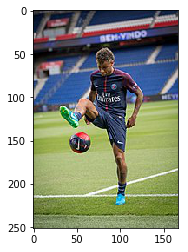

In [10]:
Neymar, Neymar_start = handle_image('Neymar.jpg')

In [11]:
U_Neymar, Neymar_dist_info, Neymar_Clusters = fuzzy_clusterization(Neymar,clusters_number,fuzz_coefficient,epsilon)

In [12]:
Neymar_Clusters

array([[ 112.21851604,  121.24348631,  102.54705371],
       [ 116.55850753,  125.61234902,  101.89669661],
       [ 114.28399692,  123.05052187,  101.70473228]])

In [13]:
U_Neymar

array([[ 0.47529783,  0.1932371 ,  0.33146507],
       [ 0.51569109,  0.16122546,  0.32308345],
       [ 0.49131922,  0.17922943,  0.32945136],
       ..., 
       [ 0.01869299,  0.89493547,  0.08637153],
       [ 0.03282778,  0.84859697,  0.11857525],
       [ 0.03282778,  0.84859697,  0.11857525]])

#### Second experement

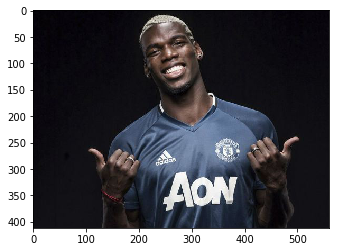

In [62]:
Paul, Paul_start = handle_image('PaulPogba.jpg')

In [66]:
U_Paul, Paul_dist_info, Paul_Clusters = fuzzy_clusterization(Paul,clusters_number,fuzz_coefficient,epsilon)

In [90]:
U_Paul

array([[ 0.59525485,  0.23685287,  0.16789228],
       [ 0.59525485,  0.23685287,  0.16789228],
       [ 0.58794237,  0.24018058,  0.17187704],
       ..., 
       [ 0.71793637,  0.17657904,  0.10548459],
       [ 0.71793637,  0.17657904,  0.10548459],
       [ 0.71793637,  0.17657904,  0.10548459]])

In [69]:
Paul_Clusters

array([[ 38.5400848 ,  38.17470259,  45.01266141],
       [ 39.96690173,  39.71444934,  46.74137318],
       [ 40.55796833,  40.30955312,  47.36896069]])

#### Third experiment

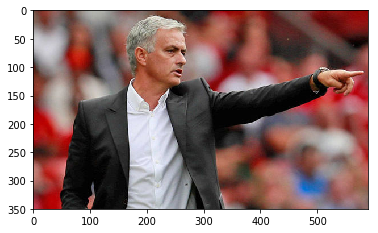

In [18]:
Joze, Joze_start = handle_image('Joze.jpg')

In [20]:
U_Joze, Joze_dist_info, Joze_Clusters = fuzzy_clusterization(Joze,clusters_number,fuzz_coefficient,epsilon)

In [91]:
U_Joze

array([[ 0.07491542,  0.20937241,  0.71571216],
       [ 0.07117429,  0.21116078,  0.71766493],
       [ 0.06790536,  0.22199571,  0.71009893],
       ..., 
       [ 0.74259329,  0.19767323,  0.05973348],
       [ 0.77738521,  0.17636866,  0.04624613],
       [ 0.79616445,  0.16424727,  0.03958828]])

In [92]:
Joze_Clusters

array([[ 122.48416421,   87.90582858,   85.51011559],
       [ 122.31786238,   86.31250716,   83.62533458],
       [ 120.77163112,   85.36024047,   82.75778791]])

#### Visualisation part

In [52]:
def max_probability_cluster(Matrix_U_row,Clusters):
    max_probability = 0
    pixel_cluster = 0
    pixel_cluster_color = []
    
    for i in range(Matrix_U_row.shape[0]):
        if Matrix_U_row[i] > max_probability:
            pixel_cluster = i
            max_probability = Matrix_U_row[i]

    pixel_cluster_color = Clusters[pixel_cluster]
    
    pixel_cluster_color = np.array(pixel_cluster_color)
    return pixel_cluster_color

In [53]:
def prepare_pixel_display(pixel):
    new_image = []
    box = []
    for i in range(7):
        for j in range(1):
            box.append(pixel)
        new_image.append(box)
    fig = plt.figure(figsize=(3,3))
    new_image = np.array(new_image)
    return new_image

In [76]:
def visualize_pixel_and_cluster(image_pixel,cluster_pixel):
    plt.subplot(1,2,1)
    plt.imshow(image_pixel)
    plt.subplot(1,2,2)
    plt.imshow(cluster_pixel)
    plt.suptitle('pixel color and cluster')
    plt.subplots_adjust(wspace = 1,top = 1.3) 

In [77]:
def visualize_result(prepared_picture_Matrix, U_matrix, Clusters_Matrix, start_pixel, end_pixel):
    stop_value = end_pixel - start_pixel
    current_pixel = start_pixel
    for i in range(stop_value):
        visualize_pixel_and_cluster(prepare_pixel_display(prepared_picture_Matrix[current_pixel]),\
                                    prepare_pixel_display(max_probability_cluster(U_matrix[current_pixel],Clusters_Matrix)))
        current_pixel +=1

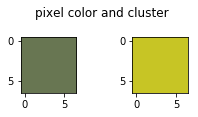

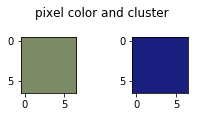

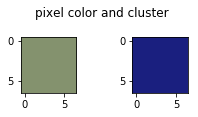

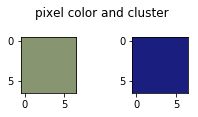

In [78]:
visualize_result(Neymar,U_Neymar,Neymar_Clusters,41912,41916)

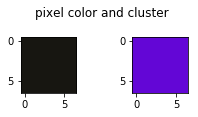

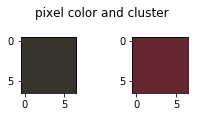

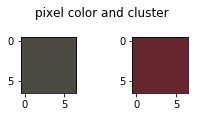

In [89]:
visualize_result(Paul,U_Paul,Paul_Clusters,5279,5282)